### 1.Download input files and required modules

In [1]:
# retrieve the road network
!rm -rf traffic_inputs && mkdir traffic_inputs
!wget "https://raw.githubusercontent.com/UCB-CE170a/Fall2021/master/traffic_data/berkeley_links.csv" -O traffic_inputs/berkeley_links.csv
!wget "https://raw.githubusercontent.com/UCB-CE170a/Fall2021/master/traffic_data/berkeley_nodes.csv" -O traffic_inputs/berkeley_nodes.csv
!wget "https://raw.githubusercontent.com/UCB-CE170a/Fall2021/master/traffic_data/day_time_od.csv" -O traffic_inputs/day_time_od.csv
!wget "https://raw.githubusercontent.com/UCB-CE170a/Fall2021/master/traffic_data/night_time_od.csv" -O traffic_inputs/night_time_od.csv

# create output directory
!rm -rf traffic_outputs
!mkdir -p traffic_outputs
!mkdir -p traffic_outputs/t_stats
!mkdir -p traffic_outputs/node_stats
!mkdir -p traffic_outputs/link_stats

--2022-10-18 12:58:44--  https://raw.githubusercontent.com/UCB-CE170a/Fall2021/master/traffic_data/berkeley_links.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 337627 (330K) [text/plain]
Saving to: ‘traffic_inputs/berkeley_links.csv’

traffic_inputs/berk 100%[===================>] 329.71K  --.-KB/s    in 0.02s   

2022-10-18 12:58:44 (16.3 MB/s) - ‘traffic_inputs/berkeley_links.csv’ saved [337627/337627]

--2022-10-18 12:58:44--  https://raw.githubusercontent.com/UCB-CE170a/Fall2021/master/traffic_data/berkeley_nodes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP reque

In [2]:
#conda install geopandas

In [3]:
#conda install shapely

### 2.Import modules and libraries -- indicate the path

In [4]:
import sys
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.wkt import loads
from shapely import wkt
import osmnx as ox
import time

In [5]:
sys.path.append(os.path.abspath('../'))

### 3.Initialize and run the simulation

In [6]:
#randomization of demand with grid - 
#traffic input path part 
#dlls - running the jupyter notebook
#the destination should be in the highway - look at the speed limit
#google colab -

Graph creation time:  1.1986351013183594


/Users/ergunacikoz/miniforge3/envs/berkeleysim/lib/python3.10/site-packages/geopandas/geodataframe.py:1471: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


traffic_inputs


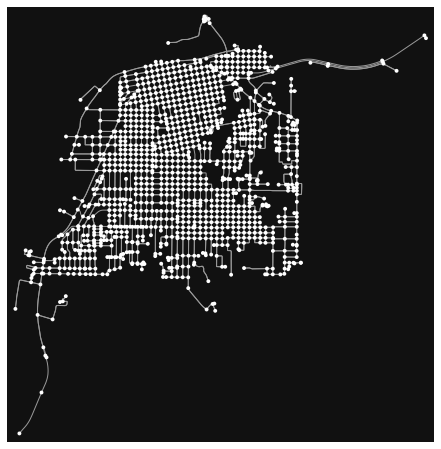

In [8]:
from api import Location

location = Location("Eureka, California")
location.run()

In [10]:
from src.sim_package import Runner

runner_demo = Runner(nodes_csv='traffic_inputseureka_california_nodes.csv',
  links_csv='traffic_inputseureka_california_edges.csv',
  od_csv=f'traffic_inputseureka_california_od.csv')
runner_demo.init_sq_simulation()

# o-d pairs whose paths cannot be found: 30
# o-d pairs/trips 6195


In [11]:
runner_demo.spatial_queue_simulation('walnut-creek-evac')

At 0 seconds, 0.0 evacuees successfully reached the destination.
At 100 seconds, 116 evacuees successfully reached the destination.
At 200 seconds, 211 evacuees successfully reached the destination.
At 300 seconds, 284 evacuees successfully reached the destination.
At 400 seconds, 351 evacuees successfully reached the destination.
At 500 seconds, 410 evacuees successfully reached the destination.
At 600 seconds, 462 evacuees successfully reached the destination.
At 700 seconds, 510 evacuees successfully reached the destination.
At 800 seconds, 557 evacuees successfully reached the destination.
At 900 seconds, 616 evacuees successfully reached the destination.
At 1000 seconds, 659 evacuees successfully reached the destination.
At 1100 seconds, 705 evacuees successfully reached the destination.
At 1200 seconds, 747 evacuees successfully reached the destination.
At 1300 seconds, 798 evacuees successfully reached the destination.


KeyboardInterrupt: 

In [8]:
from src.sim_package import Runner

runner = Runner(nodes_csv='traffic_inputs/berkeley_nodes.csv',
  links_csv='traffic_inputs/berkeley_links.csv',
  od_csv=f'traffic_inputs/{"day_time" or "night_time"}_od.csv')

runner.init_sq_simulation()

# o-d pairs whose paths cannot be found: 0
# o-d pairs/trips 3947


In [9]:
# run sim
runner.spatial_queue_simulation('berkeley-evac')

At 0 seconds, 0.0 evacuees successfully reached the destination.
At 100 seconds, 79 evacuees successfully reached the destination.
At 200 seconds, 249 evacuees successfully reached the destination.
At 300 seconds, 457 evacuees successfully reached the destination.
At 400 seconds, 653 evacuees successfully reached the destination.
At 500 seconds, 839 evacuees successfully reached the destination.
At 600 seconds, 1025 evacuees successfully reached the destination.
At 700 seconds, 1180 evacuees successfully reached the destination.
At 800 seconds, 1328 evacuees successfully reached the destination.
At 900 seconds, 1491 evacuees successfully reached the destination.
At 1000 seconds, 1659 evacuees successfully reached the destination.
At 1100 seconds, 1800 evacuees successfully reached the destination.
At 1200 seconds, 1933 evacuees successfully reached the destination.
At 1300 seconds, 2073 evacuees successfully reached the destination.
At 1400 seconds, 2206 evacuees successfully reached t

In [6]:
from src.sim_package import Runner

other_runner = Runner(nodes_csv='traffic_inputs/eureka_california_nodes.csv',
  links_csv='traffic_inputs/eureka_california_links.csv',
  od_csv='traffic_inputs/eureka_california_od.csv')

other_runner.init_sq_simulation()

# o-d pairs whose paths cannot be found: 30
# o-d pairs/trips 6195


In [7]:
# run sim
other_runner.spatial_queue_simulation('eureka-evac')

At 0 seconds, 0.0 evacuees successfully reached the destination.
At 100 seconds, 114 evacuees successfully reached the destination.
At 200 seconds, 214 evacuees successfully reached the destination.
At 300 seconds, 302 evacuees successfully reached the destination.
At 400 seconds, 360 evacuees successfully reached the destination.
At 500 seconds, 407 evacuees successfully reached the destination.
At 600 seconds, 469 evacuees successfully reached the destination.
At 700 seconds, 519 evacuees successfully reached the destination.
At 800 seconds, 561 evacuees successfully reached the destination.
At 900 seconds, 602 evacuees successfully reached the destination.
At 1000 seconds, 651 evacuees successfully reached the destination.
At 1100 seconds, 696 evacuees successfully reached the destination.
At 1200 seconds, 745 evacuees successfully reached the destination.
At 1300 seconds, 794 evacuees successfully reached the destination.
At 1400 seconds, 843 evacuees successfully reached the desti

#### 4.Compare with OSMNX